# Exploratory Data Analysis for Dataset 1: Heart Disease Dataset

## Importing Libraries

In [88]:
import sklearn
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sb
from itertools import product
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Retrieving and Cleaning (Lab 1)
- Getting CSV file
- Retrieving basic information on the dataset
- Removing duplicates and instances with null values

In [89]:
df=pd.read_csv('../../data/dataset/original_datasets/heart_2020_cleaned.csv')

In [90]:
#First 10 rows of the dataframe
df.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [92]:
isNull = df.isna().sum()
duplicates_no = df.duplicated().sum()
print('Null values:\n',isNull)
print('\n\nDuplicates: ', duplicates_no)
df_shape = df.shape

Null values:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Duplicates:  18078


In [93]:
df.drop_duplicates(inplace=True)
print('Dataframe shape before:', df_shape)
print('\nDataframe shape after:', df.shape)

Dataframe shape before: (319795, 18)

Dataframe shape after: (301717, 18)


In [94]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


Heart Disease Count: 
 HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64 



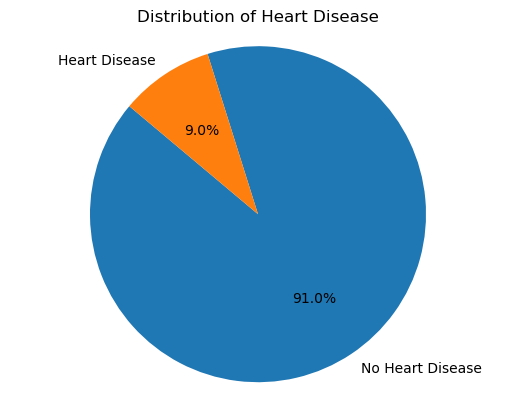

In [95]:

counts = df['HeartDisease'].value_counts()
print ('Heart Disease Count: \n' , counts, '\n')
plt.pie(counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Heart Disease')
plt.show()


In [96]:
df['Diabetic'].value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

Making the diabetic feature binary due to the borderline and during pregnancy categories making up only 3%

In [97]:
df['Diabetic'] = df['Diabetic'].replace({
    'No, borderline diabetes': 'No',
    'Yes (during pregnancy)': 'Yes'
})

## General Statistics and VIsualization

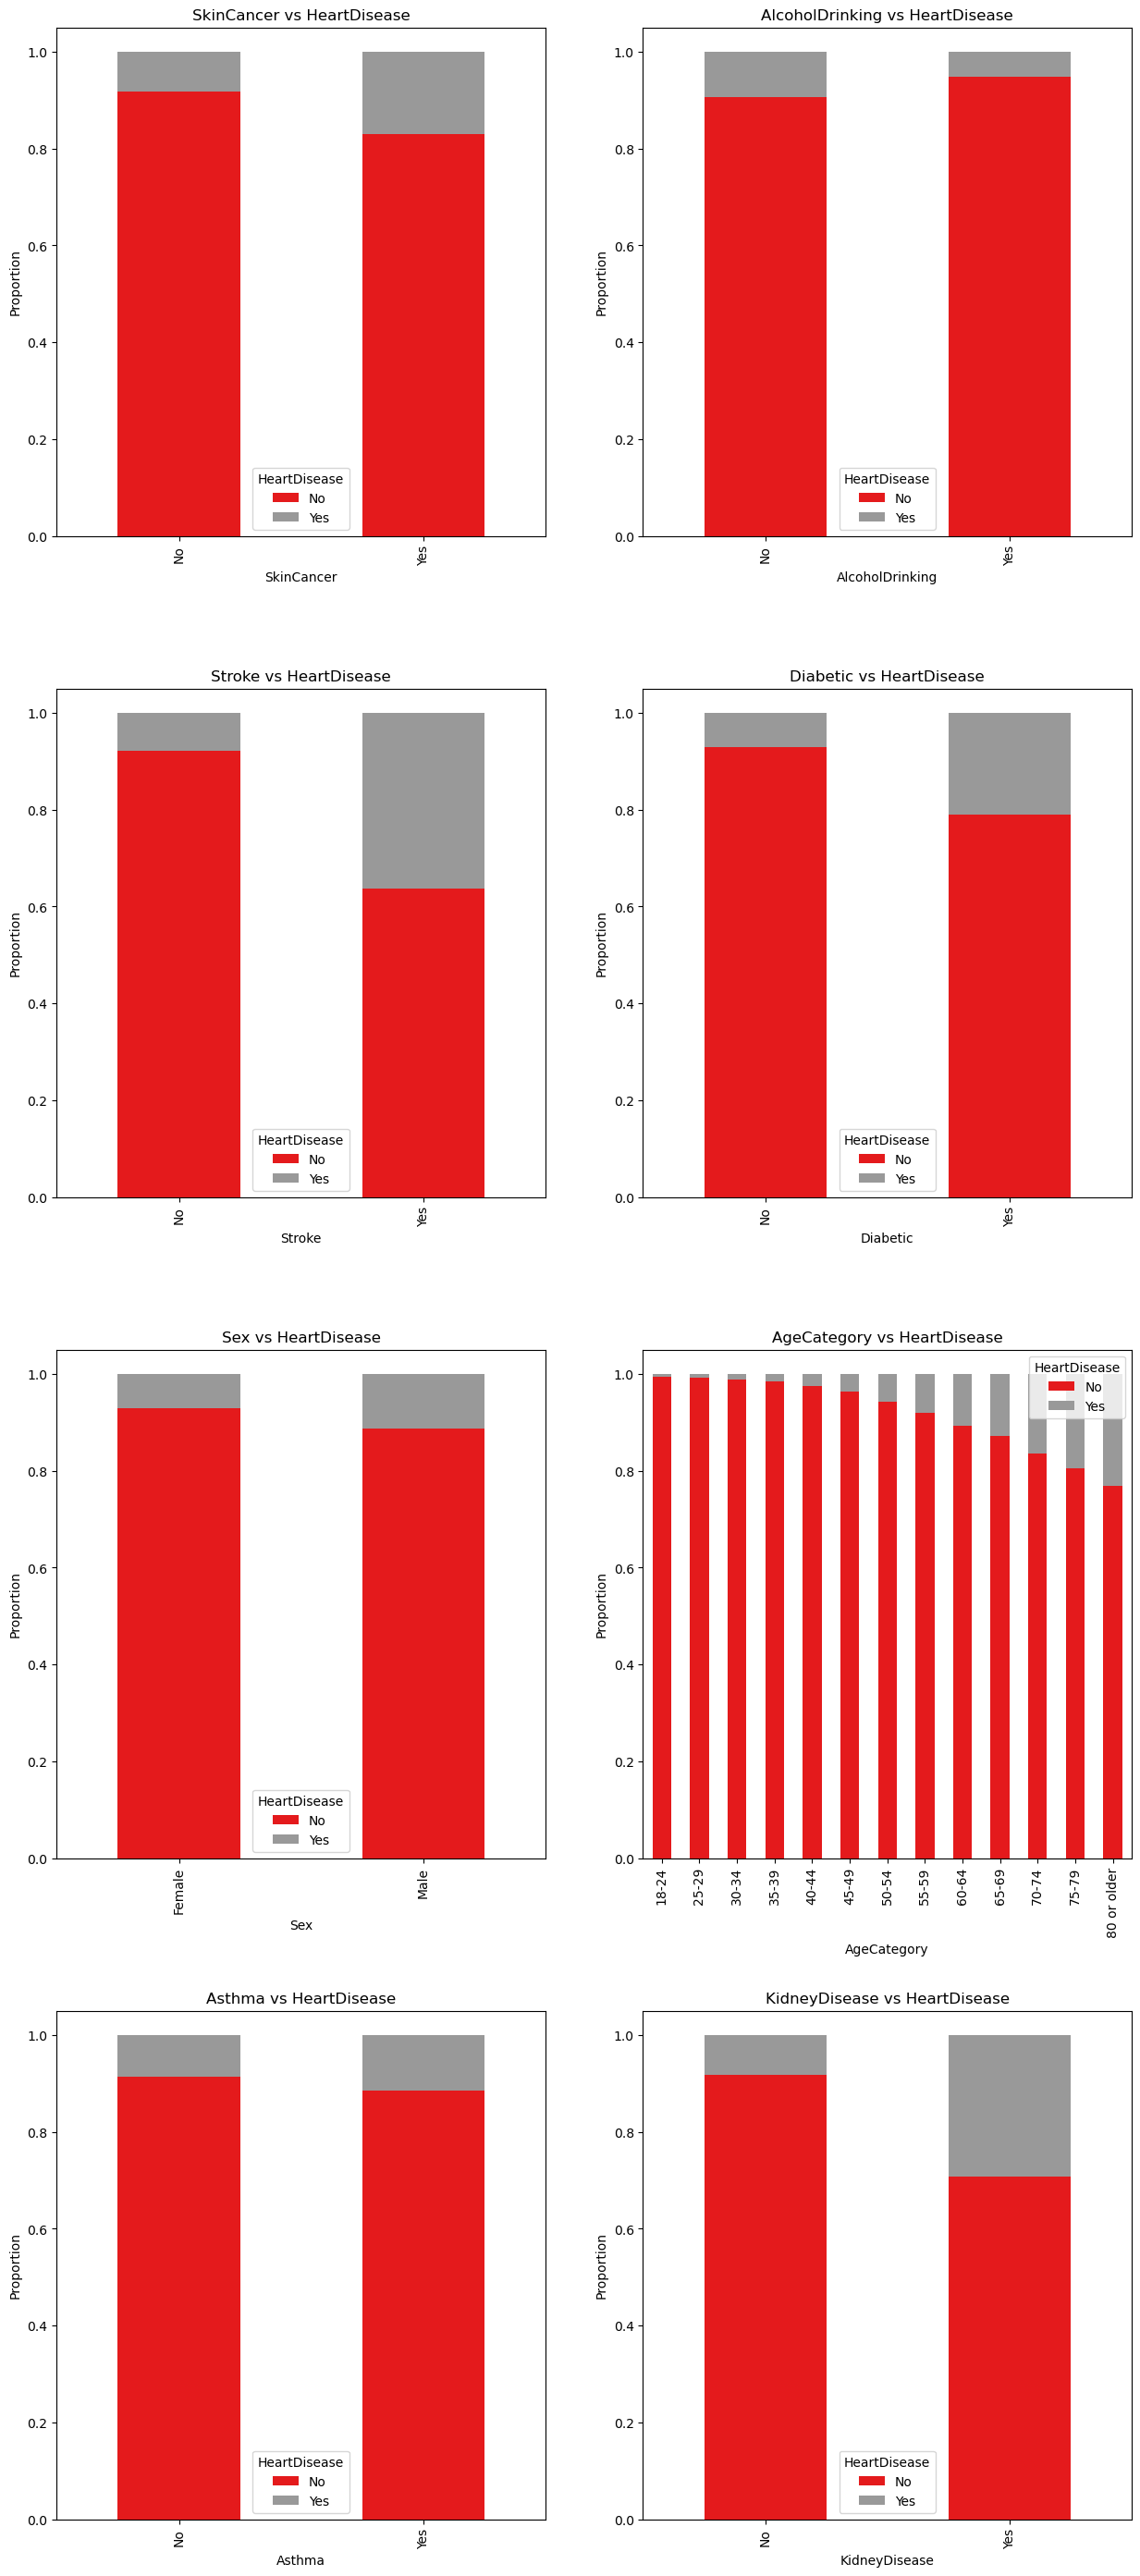

In [98]:
def stacked_bar(data, feature, target, ax, color_palette='tab20'):
  crosstab = pd.crosstab(data[feature], data[target], normalize='index')
  crosstab.plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)
  ax.set_title(f'{feature} vs {target}')
  ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(4, 2, figsize=(15, 35))

# Color palette selection (optional)
color_palette = 'Set1' 

# Plot each feature
stacked_bar(df, 'SkinCancer', 'HeartDisease', axes[0, 0], color_palette=color_palette)
stacked_bar(df, 'AlcoholDrinking', 'HeartDisease', axes[0, 1], color_palette=color_palette)
stacked_bar(df, 'Stroke', 'HeartDisease', axes[1, 0], color_palette=color_palette)
stacked_bar(df, 'Diabetic', 'HeartDisease', axes[1, 1], color_palette=color_palette)
stacked_bar(df, 'Sex', 'HeartDisease', axes[2, 0], color_palette=color_palette)
stacked_bar(df, 'AgeCategory', 'HeartDisease', axes[2, 1], color_palette=color_palette)
stacked_bar(df, 'Asthma', 'HeartDisease', axes[3, 0], color_palette=color_palette)
stacked_bar(df, 'KidneyDisease', 'HeartDisease', axes[3, 1], color_palette=color_palette)
# Adjust layout
plt.subplots_adjust(hspace=0.3)
plt.show()

In [99]:
X = df.drop("HeartDisease", axis=1)  # Features
y = df["HeartDisease"]  # Target

In [100]:
rus = RandomUnderSampler(random_state=45)  # Set random seed for reproducibility
X_resampled, y_resampled = rus.fit_resample(X, y)

In [101]:
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after undersampling:
HeartDisease
No     27261
Yes    27261
Name: count, dtype: int64


In [102]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['HeartDisease'] = y_resampled

In [103]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54522 entries, 297669 to 319790
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               54522 non-null  float64
 1   Smoking           54522 non-null  object 
 2   AlcoholDrinking   54522 non-null  object 
 3   Stroke            54522 non-null  object 
 4   PhysicalHealth    54522 non-null  float64
 5   MentalHealth      54522 non-null  float64
 6   DiffWalking       54522 non-null  object 
 7   Sex               54522 non-null  object 
 8   AgeCategory       54522 non-null  object 
 9   Race              54522 non-null  object 
 10  Diabetic          54522 non-null  object 
 11  PhysicalActivity  54522 non-null  object 
 12  GenHealth         54522 non-null  object 
 13  SleepTime         54522 non-null  float64
 14  Asthma            54522 non-null  object 
 15  KidneyDisease     54522 non-null  object 
 16  SkinCancer        54522 non-null  objec

## Feature Selection (Lab 2)
The dataset has 18 features and we need to go through the process of selecting features using Univariate and Feature Importance Selection

In [131]:
from sklearn.preprocessing import LabelEncoder as LE
encoder=LE()

df_num = resampled_df.copy()

for col in df_num.columns:
    if df_num[col].dtype == 'object':
        df_num[col] = encoder.fit_transform(df_num[col])
        # Print the mapping between original categories and assigned numerical values
        print(f"Column: {col}")
        print(f"Mapping: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}\n")


Column: Smoking
Mapping: {'No': 0, 'Yes': 1}

Column: AlcoholDrinking
Mapping: {'No': 0, 'Yes': 1}

Column: Stroke
Mapping: {'No': 0, 'Yes': 1}

Column: DiffWalking
Mapping: {'No': 0, 'Yes': 1}

Column: Sex
Mapping: {'Female': 0, 'Male': 1}

Column: AgeCategory
Mapping: {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}

Column: Race
Mapping: {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4, 'White': 5}

Column: Diabetic
Mapping: {'No': 0, 'Yes': 1}

Column: PhysicalActivity
Mapping: {'No': 0, 'Yes': 1}

Column: GenHealth
Mapping: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}

Column: Asthma
Mapping: {'No': 0, 'Yes': 1}

Column: KidneyDisease
Mapping: {'No': 0, 'Yes': 1}

Column: SkinCancer
Mapping: {'No': 0, 'Yes': 1}

Column: HeartDisease
Mapping: {'No': 0, 'Yes': 1}



In [135]:

X = df_num.iloc[:,0:15]
y = df_num.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k = 10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

            Features         Score
4     PhysicalHealth  54844.981960
8        AgeCategory  15583.246000
6        DiffWalking   3280.897272
3             Stroke   2588.354763
10          Diabetic   2516.266576
5       MentalHealth   1232.806956
1            Smoking    962.344151
0                BMI    451.461540
7                Sex    412.190551
11  PhysicalActivity    349.769831


In [139]:
top_features_per_class = {}

for class_label in y.unique():
    # Create a binary target variable for the current class
    y_binary = (y == class_label).astype(int)
    print(class_label)

    # Apply SelectKBest with k=2
    bestfeatures = SelectKBest(score_func=chi2, k=4)
    fit = bestfeatures.fit(X, y_binary)

    # Get feature scores and names
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Features', 'Score']

    print(featureScores.nlargest(4,'Score')) 

    # Store the top 2 features for the current class
    top_features_per_class[class_label] = featureScores.nlargest(4, 'Score')['Features'].tolist()

# Print the results
for class_label, features in top_features_per_class.items():
    print(f"Top 2 features for class {class_label}: {features}")

0
         Features         Score
4  PhysicalHealth  54844.981960
8     AgeCategory  15583.246000
6     DiffWalking   3280.897272
3          Stroke   2588.354763
1
         Features         Score
4  PhysicalHealth  54844.981960
8     AgeCategory  15583.246000
6     DiffWalking   3280.897272
3          Stroke   2588.354763
Top 2 features for class 0: ['PhysicalHealth', 'AgeCategory', 'DiffWalking', 'Stroke']
Top 2 features for class 1: ['PhysicalHealth', 'AgeCategory', 'DiffWalking', 'Stroke']


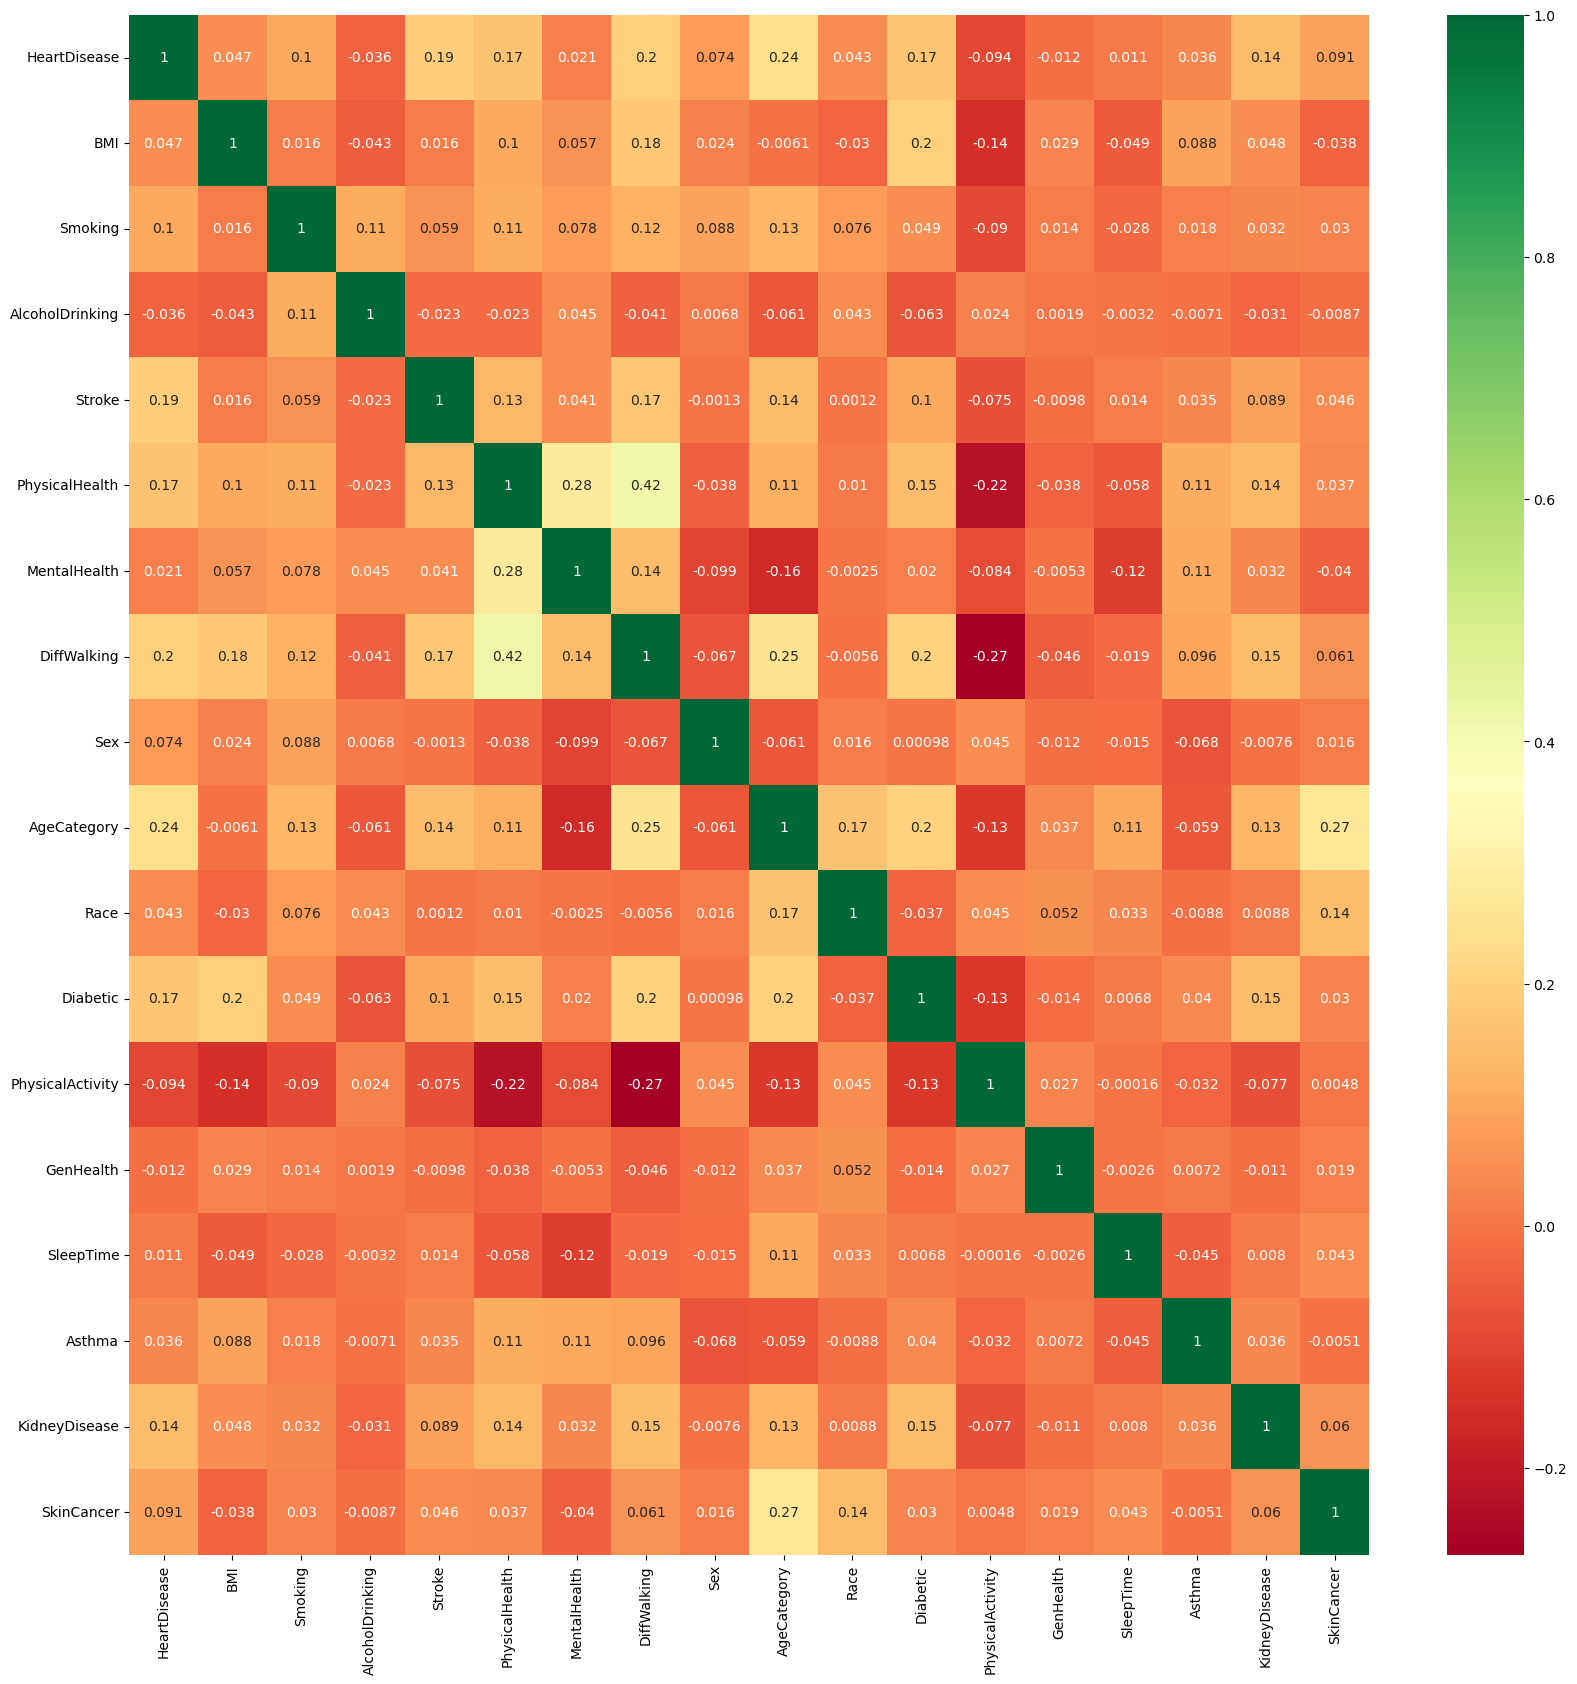

In [122]:
corrmat = df_num.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(df_num[top_corr_features].corr(),annot=True,cmap="RdYlGn")
